# **Trabalho 1 - Memorial de Cálculo e Gráficos**

**Disciplina:** PPGEE0017 - Projeto de Circuitos Integrados - PPGEEC/UFBA

**Aluno:** André Paiva Conrado Rodrigues (N=2)

## 1 - Escopo do trabalho


### Características do circuito a ser dimensionado

Dimensionamento de Fontes de Corrente (simples e cascode) com os seguintes parâmetros:

| Parâmetro | Min | Typ  | Máx   | Unidade |
|-----------|-----|------|-------|---------|
| $I_{out}$ | --  | 20   | --    | $\mu \mathrm{A}$ |
| $V_{out}$ | --  | --   | 0.3   | V       |
| $V_{DD}$  | --  | 0.6  | --    | V       |
| $V_{SS}$  | --  | -0.6 | --    | V       |
| $W$       | 160 | --   | 32000 | nm      |
| $L$       | 120 | --   | 24000 | nm      |

### Parâmetros da tecnologia

| Parâmetro  | Canal N | Canal P | Unidade |
|------------|---------|---------|---------|
| $I_{sq}$   | 353.38  | 49.514  | nA      |
| $n$        | 1,3790  | 1,2952  | -       |
| $\phi_{t}$ | 26      | 26      | mV      |
| $V_{T0}$   | 0,3618  | -0,3554 | V       |

In [31]:
# Características da fonte de corrente
I_out = 20e-6
V_out_max = 0.3
VDD = 0.6
VSS = -0.6

# Parâmetros da tecnologia
Isq_p = 49.514e-9
Isq_n = 353.38e-9
N_p = 1.2952
N_n = 1.3790
VT0_p = -0.3554
VT0_n = 0.3618
Phi_t = 26e-3

In [32]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## 2 - Dimensionamento de fonte de corrente simples

### 2.A - Dimensionamento de $M_{1S}$

In [33]:
print("Dimensionamento de M1s")
print("======================")

# Cálculo de if_max
if_max_M1s = (((VDD - V_out_max)/Phi_t) - 3)**2 - 1
print(f'If < {if_max_M1s:.3f}')

# Seleção de if < if_max
if_M1s = 70
print(f'If = {if_M1s:.3f}')

# Função para determinar f(i_f)

def f_if(i_f):
    return np.sqrt(i_f + 1) - 2 + np.log(np.sqrt(i_f + 1) - 1)

# Cálculo de VGG
f_if_M1s =  f_if(if_M1s)
vgg_M1s = -N_p * Phi_t * f_if_M1s + VT0_p + VDD
print(f"VGG = {vgg_M1s:.4f}")

# Determinar razão de aspecto
WL_ratio_M1s = I_out/(Isq_p * if_M1s)
print(f"W/L = {WL_ratio_M1s:.3f}")

# Escolha de W e L
L_M1s = 200e-9
W_M1s = L_M1s * WL_ratio_M1s
print(f"W = {W_M1s:.3e}")
print(f"L = {L_M1s:.3e}")

Dimensionamento de M1s
If < 71.905
If = 70.000
VGG = -0.0393
W/L = 5.770
W = 1.154e-06
L = 2.000e-07


*    $V_{GG1S}$ antes do ajuste: -0,0393V
*    $V_{GG1S}$ após o ajuste: -0,0546V

In [34]:
vgg_M1s_adj = -0.0546

**Circuito usado para dimensionamento da fonte de corrente simples**

![Circuito Figura A Questão 2](jupyter_img/FiguraA_Questao2_Circuito.jpg)

**Plot de $I_{out} \times V_{out}$ antes (ciano) e após (vermelho) o ajuste empírico**

![Plot Figura A Questão 2](jupyter_img/FiguraA_Questao2_Plot.jpg)

### 2.B - Dimensionamento de $M_{3S}$ e $M_{4S}$

In [35]:
print("Dimensionamento de M3s e M4s")
print("============================")

# Função para inversa de f(if)
def f_if_inv(f_if):
    u = f_if + 2
    k_u = 1 - ((84.4839)/(u**2 + 150.8640))
    frac = np.exp(u-1)/(1 + (k_u * np.log(1 + np.exp(u-1))))
    i_f = (1 + np.log(1+frac))**2 - 1
    return i_f

# Cálculo de funções dos níveis de inversão
f_if_M3s = (vgg_M1s_adj - VSS - VT0_n)/(N_n * Phi_t)
f_if_M4s = -(vgg_M1s_adj - VDD - VT0_p)/(N_p * Phi_t)

# Definição de níveis de inversão de M3s e M4s
if_M3s = f_if_inv(f_if_M3s)
if_M4s = f_if_inv(f_if_M4s)
print(f"If M3s = {if_M3s:.3f}")
print(f"If M4s = {if_M4s:.3f}")

# Escolha de I_d
I_d_M34s = 3e-6

# Escolha de W/L para M3s e M4s
WL_ratio_M3s = I_d_M34s/(Isq_n*if_M3s)
WL_ratio_M4s = I_d_M34s/(Isq_p*if_M4s)
print(f"W/L M3s = {WL_ratio_M3s:.3f}")
print(f"W/L M4s = {WL_ratio_M4s:.3f}")

# Escolha de W e L
W_M3s = 200e-9
L_M3s = W_M3s/WL_ratio_M3s
W_M4s = 200e-9
L_M4s = W_M4s/WL_ratio_M4s
print(f"W M3s = {W_M3s:.3e}")
print(f"L M3s = {L_M3s:.3e}")
print(f"W M4s = {W_M4s:.3e}")
print(f"L M4s = {L_M4s:.3e}")

Dimensionamento de M3s e M4s
If M3s = 30.519
If M4s = 77.025
W/L M3s = 0.278
W/L M4s = 0.787
W M3s = 2.000e-07
L M3s = 7.190e-07
W M4s = 2.000e-07
L M4s = 2.543e-07


*    $V_{GG1S}$ antes do ajuste: -0,1159V
*    $V_{GG1S}$ após o ajuste: -0,0546V

Dimensões após o ajuste:

*    $W_{3S}$ = 200 nm
*    $L_{3S}$ = 1969 nm
*    $W_{4S}$ = 200 nm
*    $L_{4S}$ = 200 nm

**Circuito usado para dimensionamento do divisor de tensão**

![Circuito Figura A Questão 4](jupyter_img/FiguraA_Questao4_Circuito.jpg)

### 2.C - Simulação completa de fonte de corrente simples

**Circuito final usado para simulação da fonte de corrente simples**

![Circuito Figura A Questão 5](jupyter_img/FiguraA_Questao5_Circuito.jpg)

**Plot de $I_{out} \times V_{out}$ na simulação do circuito final**

![Plot Figura A Questão 2](jupyter_img/FiguraA_Questao5_Plot.jpg)

In [36]:
#Transcondutância de saída para o meio da faixa de excursão (fonte simples)
g_out_simples = (19.995685e-6 - 20.001176e-6)/(-150e-3 - (-149e-3))
print(f"g_out Fonte simples = {g_out_simples:.3e}")

g_out Fonte simples = 5.491e-06


## 3 - Dimensionamento de fonte de corrente cascode

### 3.A - Dimensionamento de $M_{1C}$ e $M_{2}$

In [37]:
print("Dimensionamento de M1c e M2")
print("===========================")

# Escolha de If M2
if_M2 = 15
print(f"If M2 = {if_M2}")

# Cálculo de limites para VGG M2
vgg_M2_min = N_p*(V_out_max + 5*Phi_t - Phi_t*np.log(np.sqrt(if_M2 + 1) - 1)) - ((N_p - 1)*VDD) + VT0_p
vgg_M2_max = VDD + VT0_p - N_p*Phi_t*(f_if(if_M2) + 4)
print(f"{vgg_M2_min:.3f} < VGG M2 < {vgg_M2_max:.3f}")

# Escolha de VGG M2
vgg_M2 = 0.00
print(f"VGG M2 = {vgg_M2:.3f}")

# Cálculo de limite para If M1C
if_M1c_max = (-f_if(if_M2) - ((vgg_M2 - VDD - VT0_p)/(N_p)) - 3)**2 - 1
print(f"If M1c < {if_M1c_max:.3f}")

if_M1c = 33
print(f"If M1c = {if_M1c}")

vgg_M1c = VDD + VT0_p - N_p*Phi_t*f_if(if_M1c)
print(f"VGG M1c = {vgg_M1c:.3f}")

WL_ratio_M1c = I_out/(Isq_p*if_M1c)
WL_ratio_M2 = I_out/(Isq_p*if_M2)
print(f"W/L M1c = {WL_ratio_M1c:.3f}")
print(f"W/L M2  = {WL_ratio_M2:.3f}")

L_M1c = 200e-9
W_M1c = L_M1c * WL_ratio_M1c
L_M2 = 200e-9
W_M2 = L_M2 * WL_ratio_M2

print(f"W M1c = {W_M1c:.3e}")
print(f"L M1c = {L_M1c:.3e}")
print(f"W M2  = {W_M2:.3e}")
print(f"L M2  = {L_M2:.3e}")


Dimensionamento de M1c e M2
If M2 = 15
-0.013 < VGG M2 < 0.006
VGG M2 = 0.000
If M1c < 33.925
If M1c = 33
VGG M1c = 0.063
W/L M1c = 12.240
W/L M2  = 26.928
W M1c = 2.448e-06
L M1c = 2.000e-07
W M2  = 5.386e-06
L M2  = 2.000e-07


*    $V_{GG(M1C)}$ antes do ajuste: 0,063V
*    $V_{GG(M1C)}$ após o ajuste: 0,017V
*    $V_{GG(M2)}$ antes do ajuste: 0V
*    $V_{GG(M2)}$ após o ajuste: -0,1V

In [38]:
vgg_M1c_adj = 0.017
vgg_M2_adj = -0.1

**Circuito usado para dimensionamento da fonte de corrente cascode**

![Circuito Figura B Questão 2](jupyter_img/FiguraB_Questao2_Circuito.jpg)

**Plot de $I_{out} \times V_{out}$ antes (ciano) e após (vermelho) o ajuste empírico**

![Plot Figura B Questão 2](jupyter_img/FiguraB_Questao2_Plot.jpg)

### 3.B - Dimensionamento de $M_{3C}$, $M_{4C}$, $M_{5}$ e $M_{6}$

In [39]:
print("Dimensionamento de M3c e M4c")
print("============================")

# Cálculo de funções dos níveis de inversão
f_if_M3c = (vgg_M1c_adj - VSS - VT0_n)/(N_n * Phi_t)
f_if_M4c = -(vgg_M1c_adj - VDD - VT0_p)/(N_p * Phi_t)

# Definição de níveis de inversão de M3c e M4c
if_M3c = f_if_inv(f_if_M3c)
if_M4c = f_if_inv(f_if_M4c)
print(f"If M3c = {if_M3c:.3f}")
print(f"If M4c = {if_M4c:.3f}")

# Escolha de I_d
I_d_M34c = 3e-6

# Escolha de W/L para M3c e M4c
WL_ratio_M3c = I_d_M34c/(Isq_n*if_M3c)
WL_ratio_M4c = I_d_M34c/(Isq_p*if_M4c)
print(f"W/L M3c = {WL_ratio_M3c:.3f}")
print(f"W/L M4c = {WL_ratio_M4c:.3f}")

# Escolha de W e L
W_M3c = 200e-9
L_M3c = W_M3c/WL_ratio_M3c
W_M4c = 200e-9
L_M4c = W_M4c/WL_ratio_M4c
print(f"W M3c = {W_M3c:.3e}")
print(f"L M3c = {L_M3c:.3e}")
print(f"W M4c = {W_M4c:.3e}")
print(f"L M4c = {L_M4c:.3e}")

Dimensionamento de M3c e M4c
If M3c = 52.248
If M4c = 47.858
W/L M3c = 0.162
W/L M4c = 1.266
W M3c = 2.000e-07
L M3c = 1.231e-06
W M4c = 2.000e-07
L M4c = 1.580e-07


In [40]:
print("Dimensionamento de M5 e M6")
print("============================")

# Cálculo de funções dos níveis de inversão
f_if_M5 = (vgg_M2_adj - VSS - VT0_n)/(N_n * Phi_t)
f_if_M6 = -(vgg_M2_adj - VDD - VT0_p)/(N_p * Phi_t)

# Definição de níveis de inversão de M5 e M6
if_M5 = f_if_inv(f_if_M5)
if_M6 = f_if_inv(f_if_M6)
print(f"If M5 = {if_M5:.3f}")
print(f"If M6 = {if_M6:.3f}")

# Escolha de I_d
I_d_M56 = 3e-6

# Escolha de W/L para M5 e M6
WL_ratio_M5 = I_d_M56/(Isq_n*if_M5)
WL_ratio_M6 = I_d_M56/(Isq_p*if_M6)
print(f"W/L M5 = {WL_ratio_M5:.3f}")
print(f"W/L M6 = {WL_ratio_M6:.3f}")

# Escolha de W e L
W_M5 = 200e-9
L_M5 = W_M5/WL_ratio_M5
W_M6 = 200e-9
L_M6 = W_M6/WL_ratio_M6
print(f"W M5 = {W_M5:.3e}")
print(f"L M5 = {L_M5:.3e}")
print(f"W M6 = {W_M6:.3e}")
print(f"L M6 = {L_M6:.3e}")

Dimensionamento de M5 e M6
If M5 = 20.064
If M6 = 99.554
W/L M5 = 0.423
W/L M6 = 0.609
W M5 = 2.000e-07
L M5 = 4.727e-07
W M6 = 2.000e-07
L M6 = 3.286e-07


*    $V_{GG(M1C)}$ antes do ajuste: -0,080V
*    $V_{GG(M1C)}$ após o ajuste: 0,017V
*    $V_{GG(M2)}$ antes do ajuste: -0,145V
*    $V_{GG(M2)}$ após o ajuste: -0,100V

Dimensões após o ajuste:

*    $W_{3C}$ = 200 nm
*    $L_{3C}$ = 1000 nm
*    $W_{4C}$ = 711 nm
*    $L_{4C}$ = 200 nm
*    $W_{5}$ = 200 nm
*    $L_{5}$ = 810 nm
*    $W_{6}$ = 200 nm
*    $L_{6}$ = 160 nm

**Circuito usado para dimensionamento dos divisores de tensão**

![Circuito Figura B Questão 4](jupyter_img/FiguraB_Questao4_Circuito.jpg)

### 3.C - Simulação completa de fonte de corrente cascode

**Circuito final usado para simulação da fonte de corrente cascode**

![Circuito Figura B Questão 5](jupyter_img/FiguraB_Questao5_Circuito.jpg)

**Plot de $I_{out} \times V_{out}$ na simulação do circuito final**

![Plot Figura B Questão 2](jupyter_img/FiguraB_Questao5_Plot.jpg)

In [41]:
#Transcondutância de saída para o meio da faixa de excursão (fonte cascode)
g_out_cascode = (20.002606e-6 - 20.003356e-6)/(-150e-3 - (-149e-3))
print(f"g_out Fonte cascode = {g_out_cascode:.3e}")

g_out Fonte cascode = 7.500e-07


## 4 - Comparação entre as topologias

**Diagrama usado para comparação**

![Circuito Comparacao](jupyter_img/FiguraAB_Comparacao_Circuito.jpg)

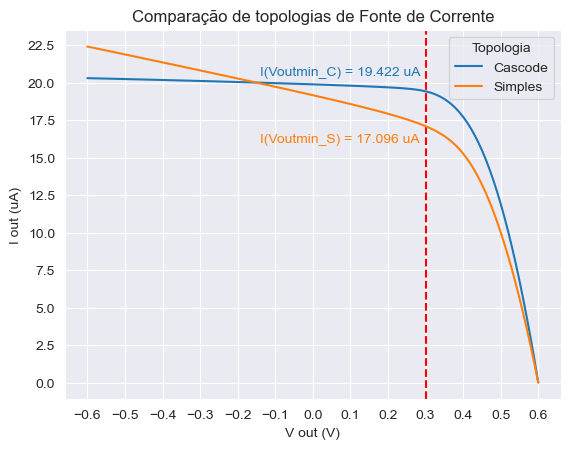

In [88]:
df_circ = pd.read_csv("LTSpice/ComparacaoFonte_Simples_Cascode.csv")
df_circ = df_circ.melt(("Vout"), var_name="Topologia", value_name="Iout")
df_circ["Iout"] *= 1e6
i_voutmin_simples = df_circ.loc[(df_circ["Vout"] == 0.3) & (df_circ["Topologia"] == "Simples")].reset_index()["Iout"][0]
i_voutmin_cascode = df_circ.loc[(df_circ["Vout"] == 0.3) & (df_circ["Topologia"] == "Cascode")].reset_index()["Iout"][0]

fig, ax = plt.subplots(1, 1)
sns.lineplot(df_circ, x="Vout", y="Iout", hue="Topologia", ax=ax)
ax.set_xlabel("V out (V)")
ax.set_ylabel("I out (uA)")
ax.set_xticks(np.arange(-0.6, 0.7, 0.1))
ax.set_yticks(np.arange(0, 25, 2.5))
ax.axvline(x=0.3, color='red', linestyle='--', zorder=1)
ax.text(-0.14, 20.5, f"I(Voutmin_C) = {i_voutmin_cascode:.3f} uA", color="tab:blue")
ax.text(-0.14, 16, f"I(Voutmin_S) = {i_voutmin_simples:.3f} uA", color="tab:orange")
ax.set_title("Comparação de topologias de Fonte de Corrente")
plt.show()

Para ambas as topologias, o meio da faixa de excursão reside em $V_{out}$ = -0,15V.

A corrente de saída observada no meio da faixa de excursão para as topologias foi:

| Topologia | $I_{out} (\mu A)$ |
|-----------|-------------------|
|  Cascode  |     20,003356     |
|  Simples  |     20,001176     |  

Percebe-se que a topologia Cascode se mostra bem mais robusta à variações de tensão dentro da faixa de excursão (o que é justificado pela baixa condutância de saída resultante do acoplamento dos dois transistores na topologia).